
This notebook splits the raw dataset into:
- A hold-out test set (~1000 samples) used only at final evaluation
- A training-validation set for all development work

Key steps:
- Remove invalid cases (e.g., sperm concentration < 2)
- Drop missing values
- Create class labels for stratification
- Use stratified sampling to ensure class balance
- Verify distributions using KS test and plots


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

In [ ]:
# ==============================
# 1. Load and inspect raw data
# ==============================

In [ ]:
raw_data = pd.read_excel('01_raw_data.xlsx')

In [ ]:
# ==============================
# 2. Preprocess raw data
# ==============================

In [ ]:
# Remove patients with sperm concentration < 2
raw_data = raw_data[raw_data['Sperm Concentration'] >= 2]

In [ ]:
#drop missing values
raw_data = raw_data.dropna()

In [ ]:
# ==============================
# 3. Create class labels for stratification
# ==============================

In [ ]:
# class labels
raw_data['DFI_Category'] = raw_data['DFI'].apply(lambda x: 'Normal' if x < 15 else 'Abnormal')
raw_data['TUNEL_Category'] = raw_data['TUNEL'].apply(lambda x: 'Normal' if x < 10 else 'Abnormal')

# class balances
dfi_balance = raw_data['DFI_Category'].value_counts(normalize=True) * 100
tunel_balance = raw_data['TUNEL_Category'].value_counts(normalize=True) * 100

print(dfi_balance)
print(tunel_balance)

DFI_Category
Abnormal    67.143614
Normal      32.856386
Name: proportion, dtype: float64
TUNEL_Category
Normal      61.483837
Abnormal    38.516163
Name: proportion, dtype: float64


In [ ]:
# ==============================
# 4. Perform stratified sampling
# ==============================

In [ ]:
# stratified sampling
hold_out, train_val = train_test_split(
    raw_data,
    test_size=0.8940,  # (9435 * (1-0.894) ≈ 1000)
    stratify=raw_data[['DFI_Category', 'TUNEL_Category']],  # stratify by multiple targets
    random_state=42  # reproducibility
)

print("\nHold-Out Set DFI Category Distribution:\n", hold_out['DFI_Category'].value_counts(normalize=True) * 100)
print("\nHold-Out Set TUNEL Category Distribution:\n", hold_out['TUNEL_Category'].value_counts(normalize=True) * 100)


Hold-Out Set DFI Category Distribution:
 DFI_Category
Abnormal    67.1
Normal      32.9
Name: proportion, dtype: float64

Hold-Out Set TUNEL Category Distribution:
 TUNEL_Category
Normal      61.5
Abnormal    38.5
Name: proportion, dtype: float64


In [ ]:
# ==============================
# 5. Visualize feature distributions
# ==============================

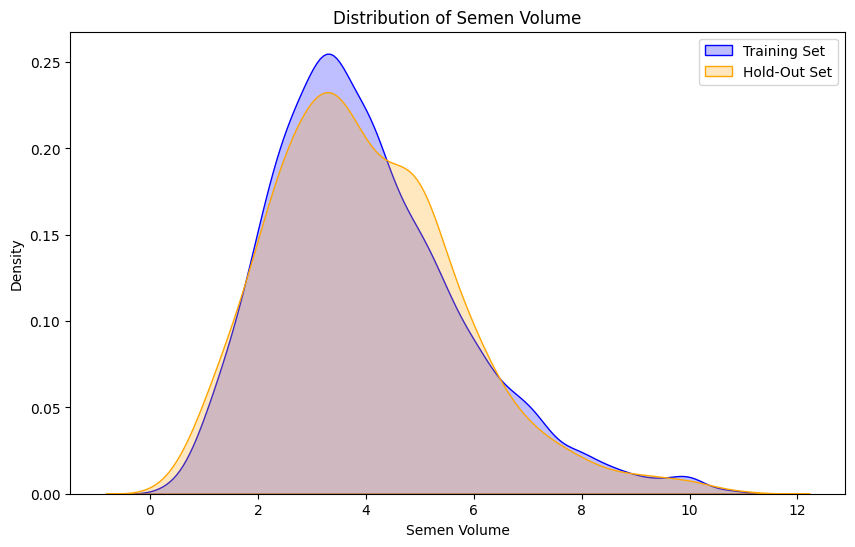

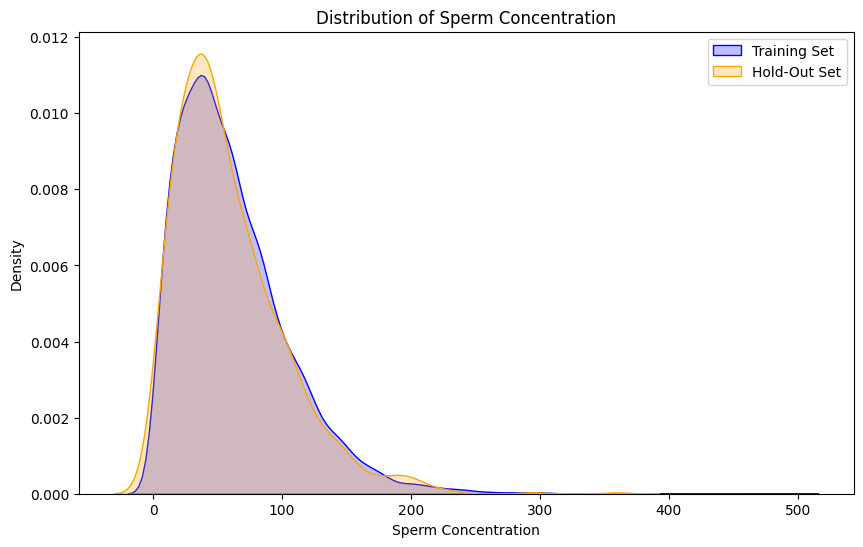

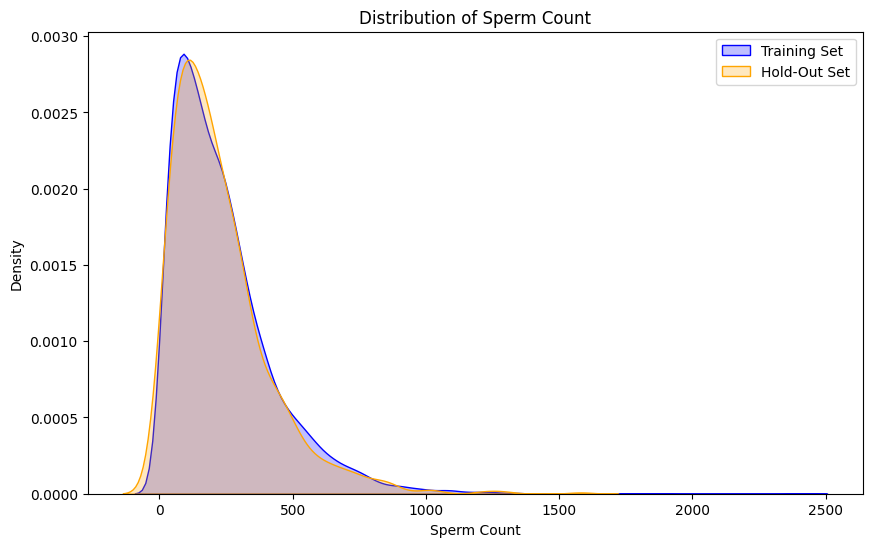

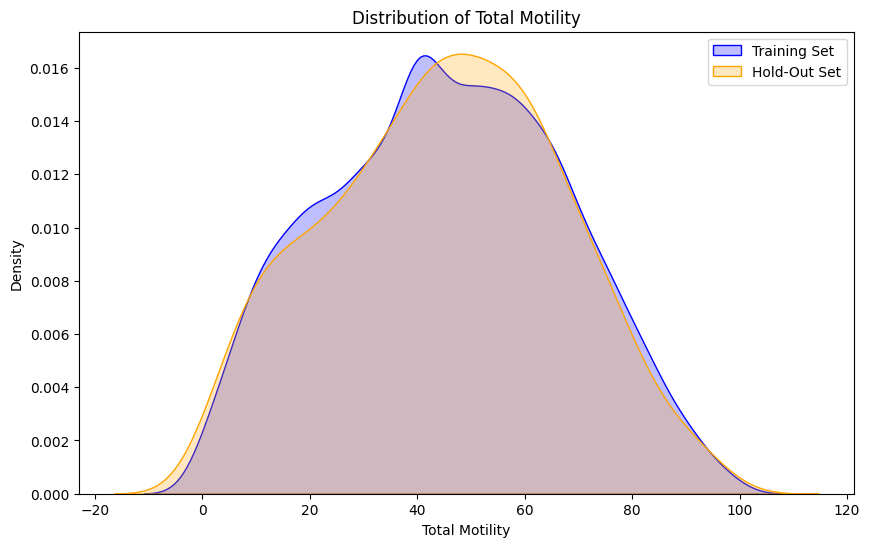

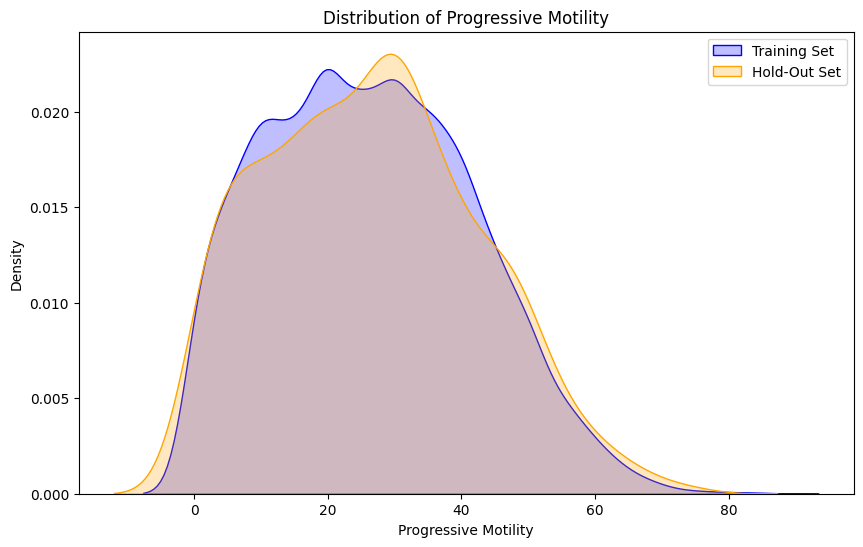

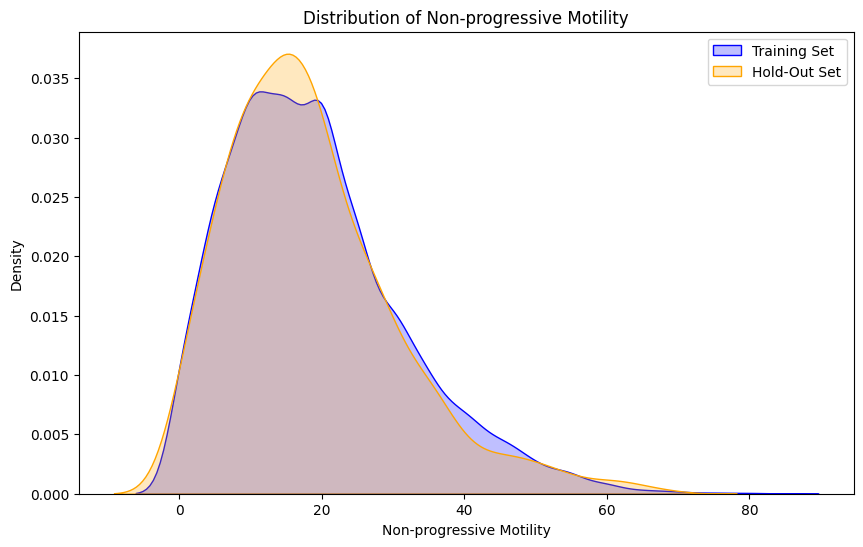

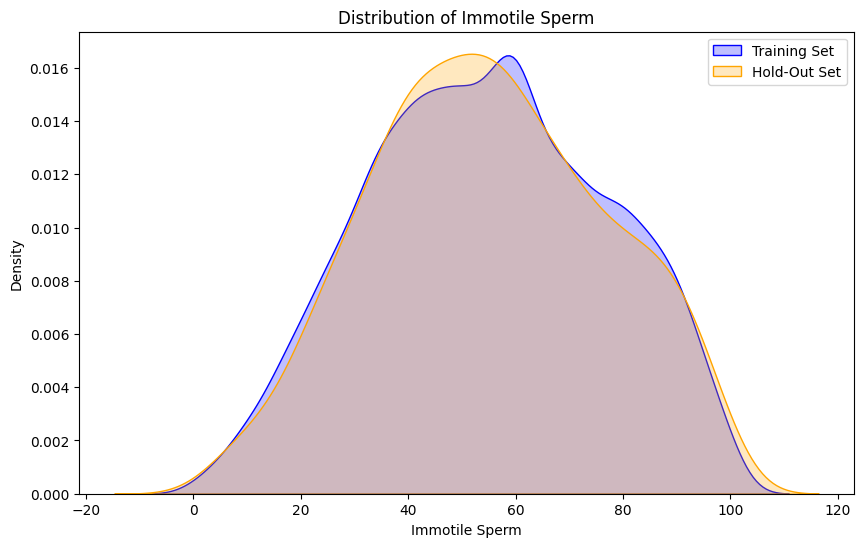

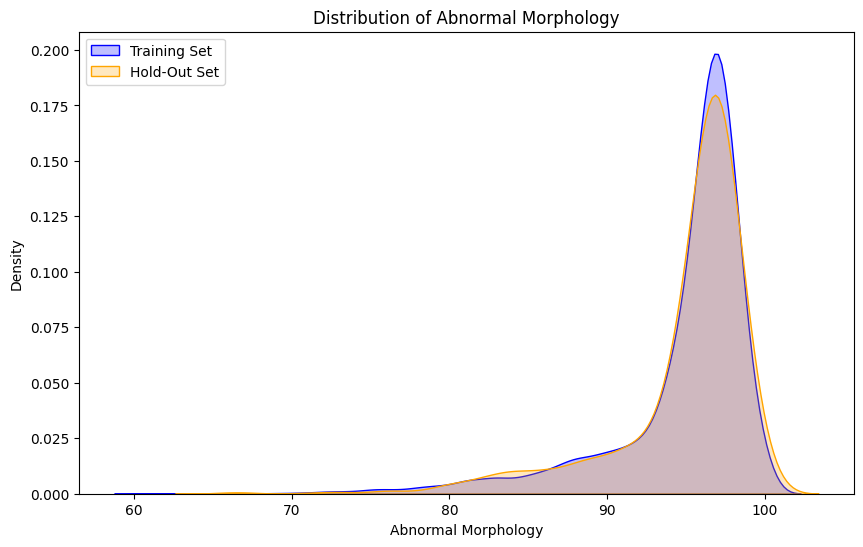

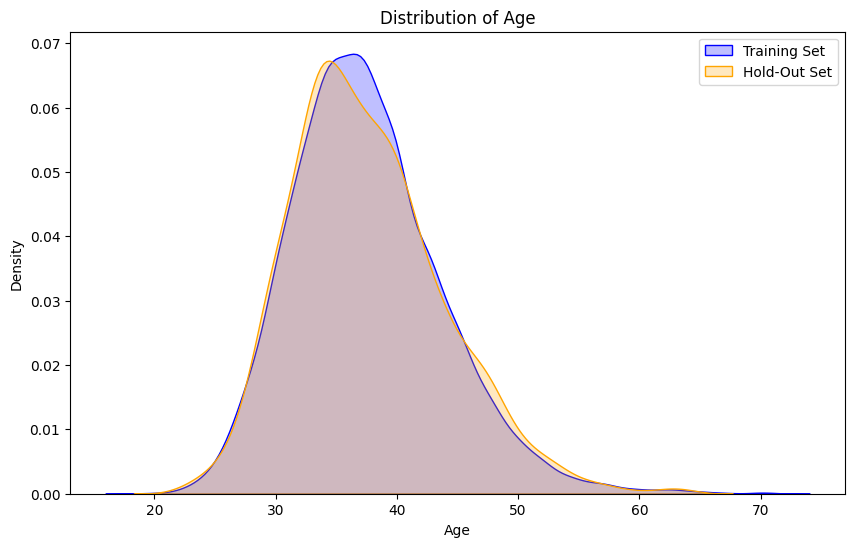

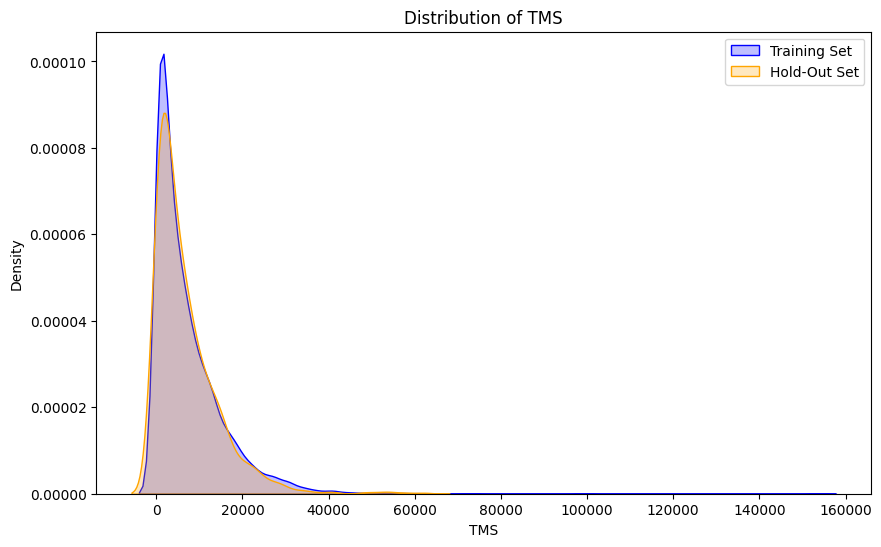

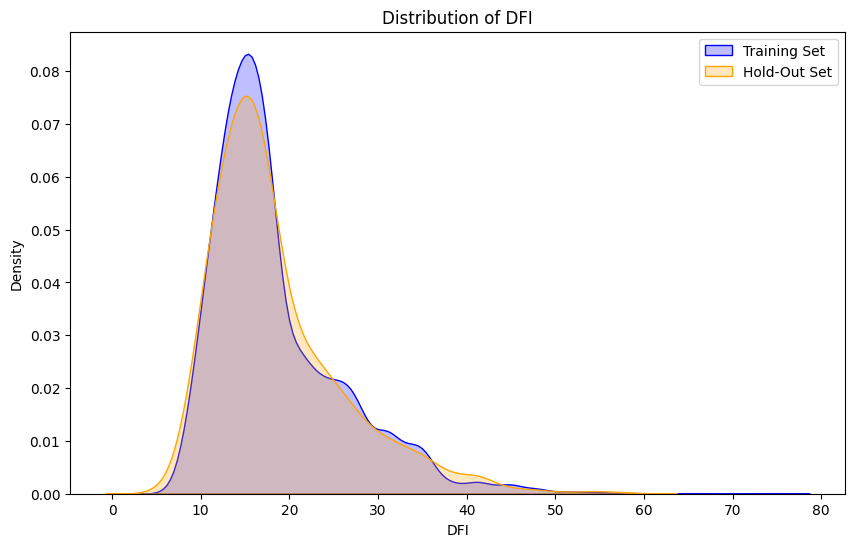

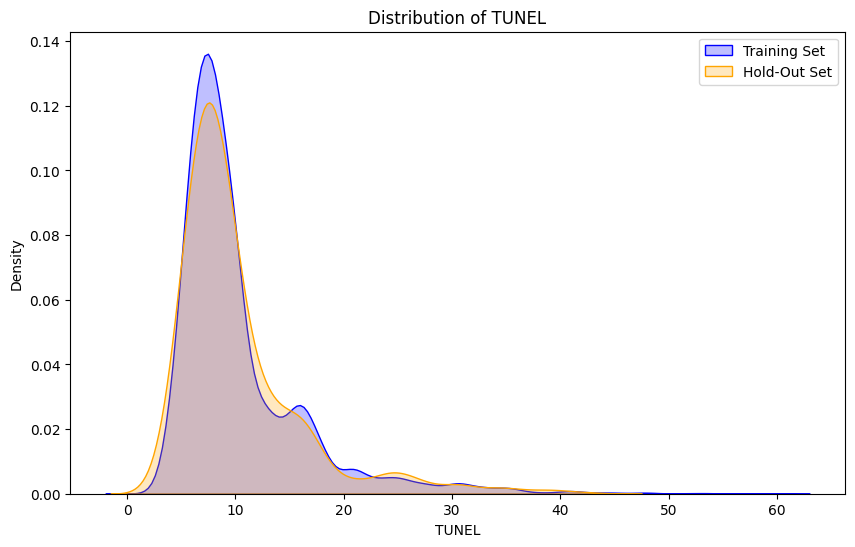

In [ ]:
# density plots
def dist(train_val, hold_out, feature):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(train_val[feature], label='Training Set', fill=True, color='blue')
    sns.kdeplot(hold_out[feature], label='Hold-Out Set', fill=True, color='orange')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


features = ['Semen Volume', 'Sperm Concentration','Sperm Count','Total Motility',
                       'Progressive Motility', 'Non-progressive Motility', 'Immotile Sperm',
                       'Abnormal Morphology', 'Age', 'TMS', 'DFI', 'TUNEL']

for feature in features:
    dist(train_val, hold_out, feature)

In [ ]:
# ==============================
# 6. Perform KS test
# ==============================

In [ ]:
# KS Test
def ks_test(train_val, hold_out, feature):
    statistic, p_value = ks_2samp(train_val[feature], hold_out[feature])
    print(f"KS Test for {feature}:")
    print(f"  KS Statistic: {statistic:.4f}, P-value: {p_value:.4e}")
    if p_value < 0.05:
        print(f"  -> The distributions differ significantly.\n")
    else:
        print(f"  -> The distributions are similar.\n")

for feature in features:
    ks_test(train_val, hold_out, feature)

KS Test for Semen Volume:
  KS Statistic: 0.0300, P-value: 3.8861e-01
  -> The distributions are similar.

KS Test for Sperm Concentration:
  KS Statistic: 0.0457, P-value: 4.5874e-02
  -> The distributions differ significantly.

KS Test for Sperm Count:
  KS Statistic: 0.0381, P-value: 1.4459e-01
  -> The distributions are similar.

KS Test for Total Motility:
  KS Statistic: 0.0197, P-value: 8.7097e-01
  -> The distributions are similar.

KS Test for Progressive Motility:
  KS Statistic: 0.0224, P-value: 7.4883e-01
  -> The distributions are similar.

KS Test for Non-progressive Motility:
  KS Statistic: 0.0411, P-value: 9.4374e-02
  -> The distributions are similar.

KS Test for Immotile Sperm:
  KS Statistic: 0.0197, P-value: 8.7097e-01
  -> The distributions are similar.

KS Test for Abnormal Morphology:
  KS Statistic: 0.0167, P-value: 9.6019e-01
  -> The distributions are similar.

KS Test for Age:
  KS Statistic: 0.0243, P-value: 6.5611e-01
  -> The distributions are similar.



In [ ]:
# ==============================
# 7. Check class balance
# ==============================

In [ ]:
# count combinations in the training
train_val_comb = train_val[['DFI_Category', 'TUNEL_Category']].value_counts().reset_index()
train_val_comb.columns = ['DFI_Category', 'TUNEL_Category', 'Count']
train_val_comb['Proportion (%)'] = (train_val_comb['Count'] / len(train_val)) * 100

print("Training-Validation Set Combinations:")
print(train_val_comb)

# count combinations in the hold-out set
hold_out_comb = hold_out[['DFI_Category', 'TUNEL_Category']].value_counts().reset_index()
hold_out_comb.columns = ['DFI_Category', 'TUNEL_Category', 'Count']
hold_out_comb['Proportion (%)'] = (hold_out_comb['Count'] / len(hold_out)) * 100

print("\nHold-Out Set Combinations:")
print(hold_out_comb)


Training-Validation Set Combinations:
  DFI_Category TUNEL_Category  Count  Proportion (%)
0     Abnormal       Abnormal   3227       38.257261
1       Normal         Normal   2749       32.590397
2     Abnormal         Normal   2437       28.891523
3       Normal       Abnormal     22        0.260818

Hold-Out Set Combinations:
  DFI_Category TUNEL_Category  Count  Proportion (%)
0     Abnormal       Abnormal    382            38.2
1       Normal         Normal    326            32.6
2     Abnormal         Normal    289            28.9
3       Normal       Abnormal      3             0.3


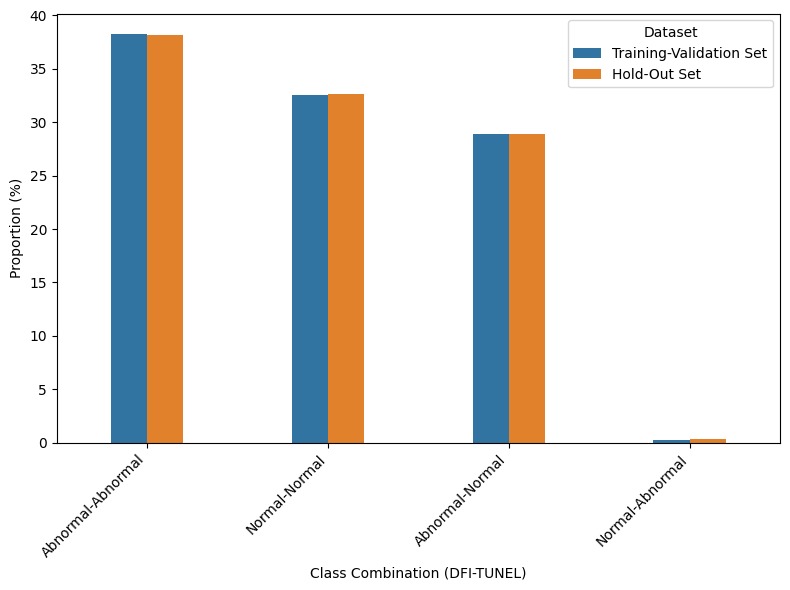

In [ ]:
def prepare_plot_data(df, set_name):
    combinations = df[['DFI_Category', 'TUNEL_Category']].value_counts().reset_index()
    combinations.columns = ['DFI_Category', 'TUNEL_Category', 'Count']
    combinations['Proportion (%)'] = (combinations['Count'] / len(df)) * 100
    combinations['Dataset'] = set_name
    combinations['Combination'] = combinations['DFI_Category'].astype(str) + '-' + \
                                   combinations['TUNEL_Category'].astype(str)
    return combinations

train_val_plot_data = prepare_plot_data(train_val, "Training-Validation Set")
hold_out_plot_data = prepare_plot_data(hold_out, "Hold-Out Set")

# Combine data for visualization
plot_data = pd.concat([train_val_plot_data, hold_out_plot_data])

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=plot_data, x='Combination', y='Proportion (%)', hue='Dataset', palette='tab10', width=0.4)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class Combination (DFI-TUNEL)")
plt.ylabel("Proportion (%)")
plt.legend(title="Dataset")
# Save with high DPI
plt.savefig("proportion.png", dpi=400, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [ ]:
# ==============================
# 8. Save the hold-out and train-validation sets
# ==============================

In [ ]:
raw_data = pd.read_excel('01_raw_data.xlsx')  #load the original data with missing values which handled later

In [ ]:
# Exclude hold-out data from raw_data
train_val_data = raw_data[~raw_data['Case Number'].isin(hold_out['Case Number'])]

In [ ]:
hold_out = hold_out.drop(columns=['DFI_Category', 'TUNEL_Category'])  # Drop class labels

hold_out.to_pickle("02_hold_out_test_data.pkl")  # Save as Pickle file
#pickle retains the format of columns

In [ ]:
train_val_data.to_pickle("02_train_val_data.pkl")  # Save as Pickle file
#pickle retains the format of columns

In [ ]:
print(f"✅ Raw data size: {raw_data.shape}")
print(f"✅ Hold-out set size: {hold_out.shape}")
print(f"✅ Train-validation set size: {train_val_data.shape}")
print(f"✅ Overlap between train and hold-out: {len(set(train_val_data['Case Number']).intersection(set(hold_out['Case Number'])))}")

✅ Raw data size: (10003, 13)
✅ Hold-out set size: (1000, 13)
✅ Train-validation set size: (9003, 13)
✅ Overlap between train and hold-out: 0
